In [17]:
# get data
data_file_dir = '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train/'

img_file_dir = '/Users/jnaiman/Downloads/leftImg8bit_trainvaltest/leftImg8bit/train/'

base_file = 'monchengladbach/monchengladbach_000000_026602_'

In [18]:
from glob import glob
import json
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
img_files_all = glob(data_file_dir + base_file + '*.png')
json_files = glob(data_file_dir + base_file + '*.json')[0]
base_img_file = glob(img_file_dir + base_file + '*.png')

img_files = base_img_file.copy()
img_files.extend(img_files_all)

img_files, json_files

(['/Users/jnaiman/Downloads/leftImg8bit_trainvaltest/leftImg8bit/train/monchengladbach/monchengladbach_000000_026602_leftImg8bit.png',
  '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_labelIds.png',
  '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_instanceIds.png',
  '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_color.png'],
 '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_polygons.json')

In [21]:
with open(json_files, 'r') as f:
    data = json.loads(f.read())

In [22]:
#data

(1024, 2048, 3)
(1024, 2048)
(1024, 2048)
(1024, 2048, 4)


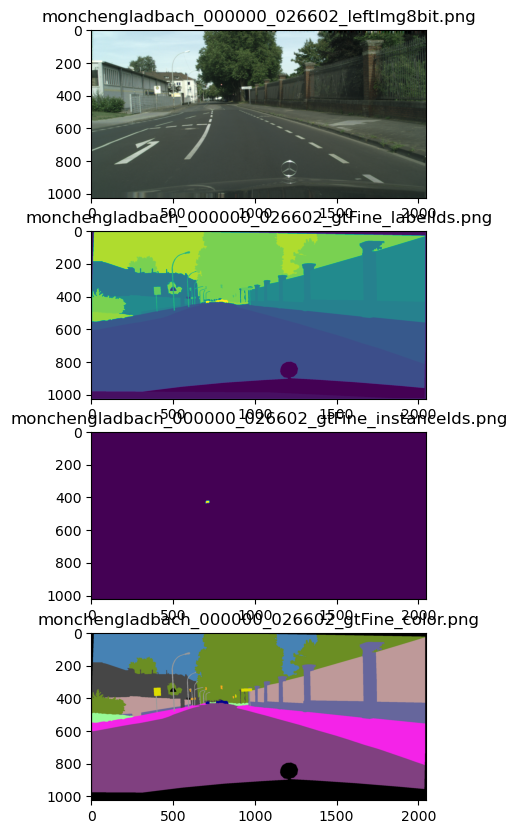

In [24]:
fig,ax = plt.subplots(len(img_files),1, figsize=(40,10))

# show each image
for i,ifile in enumerate(img_files):
    img = np.array(Image.open(ifile))
    print(img.shape)
    ax[i].imshow(img)
    ax[i].set_title(ifile.split('/')[-1])

In [25]:
img = np.array(Image.open(img_files[0]))

In [26]:
img.min(), img.max()

(0, 255)

In [27]:
# ids : labelTrainIds
label_img = np.array(Image.open(img_files[1]))

In [29]:
label_img.min(), label_img.max(), np.unique(label_img)

(1,
 26,
 array([ 1,  2,  3,  4,  7,  8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 26],
       dtype=uint8))

In [39]:
mode = 'gtFine'
split = 'train'
#transform = transform
# if mode == 'fine':
#     mode = 'gtFine'
# elif mode == 'coarse':
#      mode = 'gtCoarse'
#self.split = split
yLabel_list = []
XImg_list = []
#self.eval = eval

import os

# Preparing a list of all labelTrainIds rgb and 
# ground truth images. Setting relabbelled=True is recommended. 

#label_path = os.path.join(os.getcwd(), root_dir+'/'+self.mode+'/'+self.split)
#rgb_path = os.path.join(os.getcwd(), root_dir+'/leftImg8bit/'+self.split)
rgb_path = '/Users/jnaiman/Downloads/leftImg8bit_trainvaltest/leftImg8bit/train'
label_path = '/Users/jnaiman/Downloads/gtFine_trainvaltest/gtFine/train'
city_list = os.listdir(label_path)
for city in city_list:
    temp = os.listdir(label_path+'/'+city)
    #print(temp)
    list_items = temp.copy()

    # 19-class label items being filtered
    for item in temp:
        #if not item.endswith('labelTrainIds.png', 0, len(item)):
        if not item.endswith('labelIds.png', 0, len(item)):
            list_items.remove(item)

    print(list_items)

    # defining paths
    list_items = ['/'+city+'/'+path for path in list_items]

    yLabel_list.extend(list_items)
    XImg_list.extend(
        ['/'+city+'/'+path for path in os.listdir(rgb_path+'/'+city)]
    )
               

['zurich_000022_000019_gtFine_labelIds.png', 'zurich_000017_000019_gtFine_labelIds.png', 'zurich_000038_000019_gtFine_labelIds.png', 'zurich_000034_000019_gtFine_labelIds.png', 'zurich_000001_000019_gtFine_labelIds.png', 'zurich_000089_000019_gtFine_labelIds.png', 'zurich_000047_000019_gtFine_labelIds.png', 'zurich_000085_000019_gtFine_labelIds.png', 'zurich_000104_000019_gtFine_labelIds.png', 'zurich_000072_000019_gtFine_labelIds.png', 'zurich_000108_000019_gtFine_labelIds.png', 'zurich_000051_000019_gtFine_labelIds.png', 'zurich_000093_000019_gtFine_labelIds.png', 'zurich_000112_000019_gtFine_labelIds.png', 'zurich_000064_000019_gtFine_labelIds.png', 'zurich_000068_000019_gtFine_labelIds.png', 'zurich_000063_000019_gtFine_labelIds.png', 'zurich_000115_000019_gtFine_labelIds.png', 'zurich_000119_000019_gtFine_labelIds.png', 'zurich_000098_000019_gtFine_labelIds.png', 'zurich_000094_000019_gtFine_labelIds.png', 'zurich_000120_000019_gtFine_labelIds.png', 'zurich_000056_000019_gtFine_la

In [41]:
from torchvision import transforms
import torch

In [42]:
# get one
index = 0
image = Image.open(rgb_path+XImg_list[index])
y = Image.open(label_path+yLabel_list[index])

# if self.transform is not None:
#     image = self.transform(image)
#     y = self.transform(y)

image = transforms.ToTensor()(image)
y = np.array(y)
y = torch.from_numpy(y)

y = y.type(torch.LongTensor)

In [44]:
image.shape

torch.Size([3, 1024, 2048])

In [45]:
y.shape

torch.Size([1024, 2048])